<a href="https://colab.research.google.com/github/huckgabriel/flask_0/blob/main/Laboratorio_2_Canciones_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

In [3]:
#Se abre el el dataset
path = '/content/drive/MyDrive/UPSO/Elementos de Aprendizaje de Maquina y Big Data/Laboratorio 2/' #ruta de ubicación del archivo
filename = 'Canciones_Spotify.csv' #nombre del archivo
fullname = path+filename #ruta + nombre del archivo
df = pd.read_csv(fullname) #apertura del dataset

Target = 0 -> A la persona no le gustó la canción

Target = 1 -> A la persona le gustó la canción

In [4]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


Se eligen las columnas útiles para los clasificadores en un nuevo dataset

In [5]:
#se crea una copia del dataset
atributos_spotify = df.copy()

#se eliminan los atributos que no se van a utilizar
#"Unnamed: 0": columna de índice o identificación que no aporta información útil para el modelo
#"song_title" y "artist": contienen información de texto. Los modelos SVM trabajan mejor con características numéricas.
#"time_signature": a menos haya una razón específica para incluir esta característica, puede no ser relevante para clasificar las preferencias del usuario.

#"target": columna que actúa como etiqueta, se la debe separar y tratarla como el objetivo de clasificación.

columns_to_drop = ["Unnamed: 0", "song_title", "artist", "time_signature"]
atributos_spotify = atributos_spotify.drop(columns=columns_to_drop)

In [6]:
atributos_spotify

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,0.286,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,0.588,1
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,0.173,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,0.230,1
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,0.211,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,0.867,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,0.470,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,0.623,0


In [7]:
#Remoción de valores nulos
atributos_spotify.dropna(inplace=True) #eliminación de nan

In [8]:
#Distribución del tipo de informacion
atributos_spotify['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [9]:
atributos_spotify.nunique()

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
valence              853
target                 2
dtype: int64

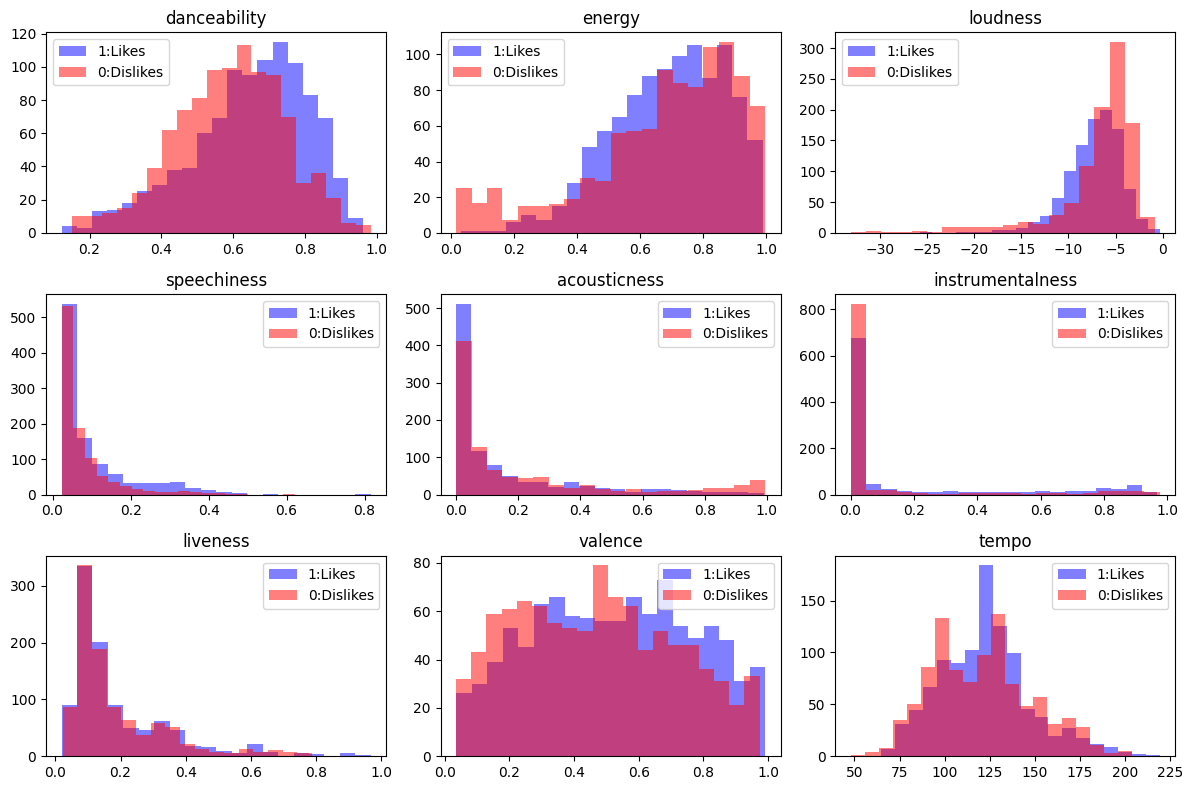

In [10]:
#Armar histogramas para conocer la distribucion de de cada valor de caracteristica
# Seleccionar las columnas relevantes y dividir el dataset en "likes" (target=1) y "dislikes" (target=0)
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

likes_atributos_spotify = atributos_spotify[atributos_spotify['target'] == 1]
dislikes_atributos_spotify = atributos_spotify[atributos_spotify['target'] == 0]

# Crear un histograma para cada característica
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)
    plt.hist(likes_atributos_spotify[feature], bins=20, alpha=0.5, label='1:Likes', color='blue')
    plt.hist(dislikes_atributos_spotify[feature], bins=20, alpha=0.5, label='0:Dislikes', color='red')
    plt.title(feature)
    plt.legend()

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar los histogramas
plt.show()

In [11]:
# Separar canciones en X y etiquetas en Y
X = atributos_spotify.drop(columns=['target'])
y = atributos_spotify['target']

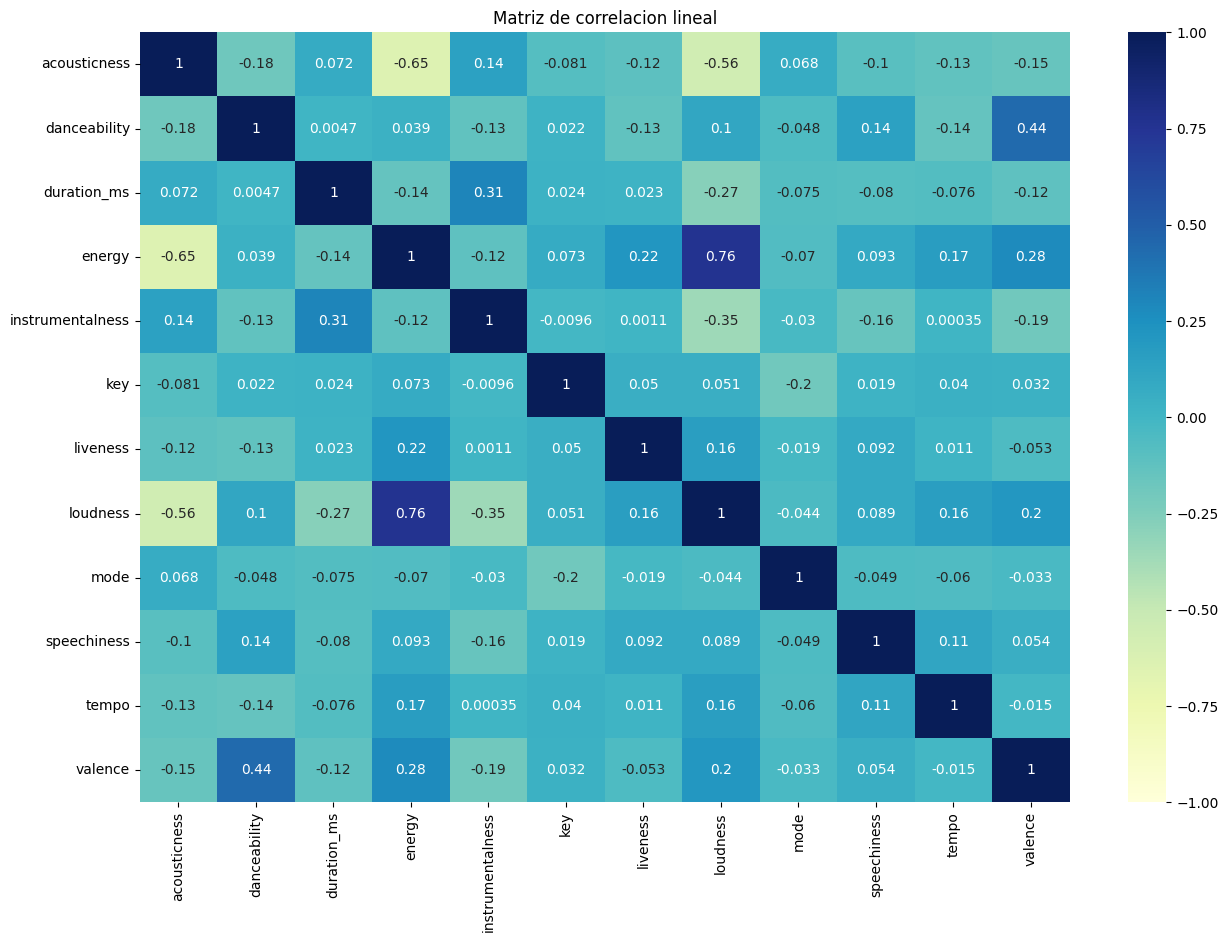

In [12]:
# Gráfico de Matriz de Correlacion Lineal
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Matriz de correlacion lineal')
plt.show()

División del dataset en datos de entrenamiento y prueba

Entrenamiento de modelos
K-Nearest Neighbors (KNN).

*   Support Vector Machines (SVM)
*   Árbol de decisión
*   Elemento de lista
*   Elemento de lista
*   Naive Bayes

In [13]:
#Importar las bibliotecas que necesitamos usar los modelos
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Arbol de decision
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [14]:
#Se dividen los datos en 70 - 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
#Importación de los modelos
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.tree import DecisionTreeClassifier #Arbol de decision
from sklearn.naive_bayes import GaussianNB

# Entrenamiento de los modelos
knn = KNeighborsClassifier() #defino el modelo knn

decision_tree = DecisionTreeClassifier() #defino el árbol de decisión
naive_bayes = GaussianNB() #defino Naive Bayes

#Ajuste los modelos a los datos de entrenamiento
knn.fit(X_train, y_train)

decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [16]:
# Función para la evaluación de la eficiencia rendimiento
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, report

In [17]:
#Evaluación de KNN
knn_accuracy, knn_conf_matrix, knn_report = evaluate_model(knn, X_test, y_test)
print(f'KNN Accuracy: {knn_accuracy}')
print('KNN Classification Report:\n', knn_report)

KNN Accuracy: 0.5544554455445545
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       296
           1       0.57      0.55      0.56       310

    accuracy                           0.55       606
   macro avg       0.55      0.55      0.55       606
weighted avg       0.55      0.55      0.55       606



In [18]:
#MODELO SVM
#Importacion de biblioteca de la SVM
from sklearn.svm import SVC #Suport Vector Machine

svm = SVC() #defino el modelo SVM
svm.fit(X_train, y_train) #entreno el modelo

#Evaluación de SVN
svm_accuracy, svm_conf_matrix,svm_report = evaluate_model(svm, X_test, y_test)
print(f'SVM Accuracy: {svm_accuracy}')
print('SVM Classification Report:\n', svm_report)

SVM Accuracy: 0.5429042904290429
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.85      0.65       296
           1       0.64      0.25      0.35       310

    accuracy                           0.54       606
   macro avg       0.58      0.55      0.50       606
weighted avg       0.58      0.54      0.50       606



In [19]:
kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

for i, C_val in enumerate(C_values):
    for k, kernel in enumerate(kernels):
        for j, gamma_val in enumerate(gamma_values):

            model = SVC(kernel=kernel, C=C_val, gamma=gamma_val)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("Kernel:", kernel, "C:", C_val, "Gamma:", gamma_val)
            svm_accuracy, svm_conf_matrix,svm_report = evaluate_model(model, X_test, y_test)
            print(f'SVM Accuracy: {svm_accuracy}')
            print('SVM Classification Report:\n', svm_report)
            col_index = j + k * len(gamma_values)

Kernel: linear C: 0.1 Gamma: 0.1
SVM Accuracy: 0.5412541254125413
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.41      0.47       296
           1       0.54      0.67      0.60       310

    accuracy                           0.54       606
   macro avg       0.54      0.54      0.53       606
weighted avg       0.54      0.54      0.53       606

Kernel: linear C: 0.1 Gamma: 1
SVM Accuracy: 0.5412541254125413
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.41      0.47       296
           1       0.54      0.67      0.60       310

    accuracy                           0.54       606
   macro avg       0.54      0.54      0.53       606
weighted avg       0.54      0.54      0.53       606

Kernel: linear C: 0.1 Gamma: 10
SVM Accuracy: 0.5412541254125413
SVM Classification Report:
               precision    recall  f1-score   support

           0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.5115511551155115
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.51      1.00      0.68       310

    accuracy                           0.51       606
   macro avg       0.26      0.50      0.34       606
weighted avg       0.26      0.51      0.35       606

Kernel: rbf C: 0.1 Gamma: 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.5115511551155115
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.51      1.00      0.68       310

    accuracy                           0.51       606
   macro avg       0.26      0.50      0.34       606
weighted avg       0.26      0.51      0.35       606

Kernel: rbf C: 0.1 Gamma: 10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.5115511551155115
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.51      1.00      0.68       310

    accuracy                           0.51       606
   macro avg       0.26      0.50      0.34       606
weighted avg       0.26      0.51      0.35       606

Kernel: linear C: 1 Gamma: 0.1
SVM Accuracy: 0.5346534653465347
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       296
           1       0.54      0.58      0.56       310

    accuracy                           0.53       606
   macro avg       0.53      0.53      0.53       606
weighted avg       0.53      0.53      0.53       606

Kernel: linear C: 1 Gamma: 1
SVM Accuracy: 0.5346534653465347
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51     